## Binary Image classification model using CNN

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [19]:
X_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [20]:
X_train = X_train.reshape(X_train.shape[0], 100,100,3)
X_test = X_test.reshape(X_test.shape[0], 100,100,3)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
print("shape of X_train" , X_train.shape)
print("shape of y_train" , y_train.shape)
print("shape of X_test" , X_test.shape)
print("shape of y_test" , y_test.shape)

shape of X_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of X_test (400, 100, 100, 3)
shape of y_test (400, 1)


In [23]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

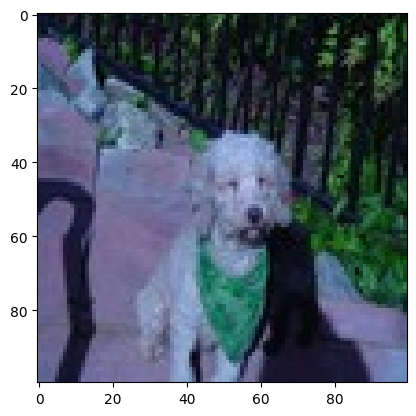

In [25]:
# display a image 
idx = random.randint(0, X_train.shape[0])
plt.imshow(X_train[idx,:])
plt.show()

### model development

In [29]:
#conv2D(num_filters, filter_size, input_shape, activation)
#MaxPooling2D(pool_size)

model = Sequential([

    Conv2D(32,(3,3),input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    # fully connected layer
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\PC PAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8801 - loss: 0.2844 - val_accuracy: 0.7000 - val_loss: 0.6342
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9138 - loss: 0.2417 - val_accuracy: 0.6950 - val_loss: 0.6819
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9433 - loss: 0.1798 - val_accuracy: 0.7000 - val_loss: 0.6868
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9568 - loss: 0.1512 - val_accuracy: 0.6950 - val_loss: 0.7558
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9670 - loss: 0.1219 - val_accuracy: 0.6875 - val_loss: 0.7709
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9814 - loss: 0.0887 - val_accuracy: 0.6925 - val_loss: 0.9788
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9743 - loss: 0.0904 - val_accuracy: 0.6675 - val_loss: 0.9721
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9846 - loss: 0.0700 - val_accuracy: 0.

In [35]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6987 - loss: 1.0731


[1.1447354555130005, 0.6775000095367432]

### Predictions

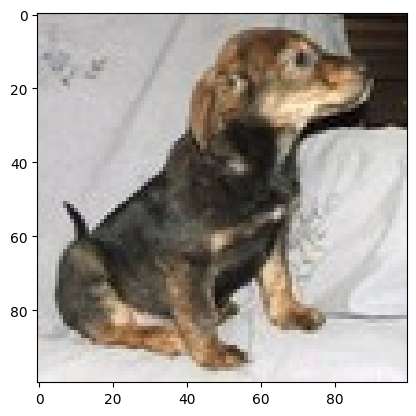

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This is a dog


In [47]:
idx2 = random.randint(0, X_test.shape[0])
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))

if y_pred > 0.5:
    print("This is a cat")
else:
    print("This is a dog")